In [10]:
import tensorflow as tf
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [12]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
len(data)

1338

In [14]:
data_one_hot = pd.get_dummies(data)
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [15]:
X = data_one_hot.drop(["charges"], axis=1)
y = data_one_hot["charges"]

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [17]:
X_train.to_numpy()

array([[46.   , 19.95 ,  2.   , ...,  1.   ,  0.   ,  0.   ],
       [47.   , 24.32 ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [52.   , 24.86 ,  0.   , ...,  0.   ,  1.   ,  0.   ],
       ...,
       [58.   , 25.175,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [37.   , 47.6  ,  2.   , ...,  0.   ,  0.   ,  1.   ],
       [55.   , 29.9  ,  0.   , ...,  0.   ,  0.   ,  1.   ]])

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"],
              callbacks=[callback])

history = model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=200)

Train on 1070 samples
Epoch 1/200
1070/1070 [==============================] - 1s 676us/sample - loss: 13105.0854 - mae: 13105.0850
Epoch 2/200
1070/1070 [==============================] - 0s 185us/sample - loss: 8820.5502 - mae: 8820.5498
Epoch 3/200
1070/1070 [==============================] - 0s 192us/sample - loss: 7413.1778 - mae: 7413.1782
Epoch 4/200
1070/1070 [==============================] - 0s 185us/sample - loss: 7194.3092 - mae: 7194.3086
Epoch 5/200
1070/1070 [==============================] - 0s 178us/sample - loss: 7027.3952 - mae: 7027.3955
Epoch 6/200
1070/1070 [==============================] - 0s 163us/sample - loss: 6845.3507 - mae: 6845.3501
Epoch 7/200
1070/1070 [==============================] - 0s 177us/sample - loss: 6653.1163 - mae: 6653.1167
Epoch 8/200
1070/1070 [==============================] - 0s 179us/sample - loss: 6590.3143 - mae: 6590.3140
Epoch 9/200
1070/1070 [==============================] - 0s 175us/sample - loss: 6509.8659 - mae: 6509.8667
Epoc

1070/1070 [==============================] - 0s 166us/sample - loss: 2248.0222 - mae: 2248.0222
Epoch 77/200
1070/1070 [==============================] - 0s 167us/sample - loss: 2208.4382 - mae: 2208.4382
Epoch 78/200
1070/1070 [==============================] - 0s 166us/sample - loss: 2232.0860 - mae: 2232.0859
Epoch 79/200
1070/1070 [==============================] - 0s 166us/sample - loss: 2220.2720 - mae: 2220.2715
Epoch 80/200
1070/1070 [==============================] - 0s 167us/sample - loss: 2173.4074 - mae: 2173.4075
Epoch 81/200
1070/1070 [==============================] - 0s 168us/sample - loss: 2144.0460 - mae: 2144.0461
Epoch 82/200
1070/1070 [==============================] - 0s 169us/sample - loss: 2165.8511 - mae: 2165.8513
Epoch 83/200
1070/1070 [==============================] - 0s 165us/sample - loss: 2119.5290 - mae: 2119.5291
Epoch 84/200
1070/1070 [==============================] - 0s 169us/sample - loss: 2185.8493 - mae: 2185.8499
Epoch 85/200
1070/1070 [========

1070/1070 [==============================] - 0s 168us/sample - loss: 2112.1417 - mae: 2112.1416
Epoch 151/200
1070/1070 [==============================] - 0s 167us/sample - loss: 2036.0012 - mae: 2036.0012
Epoch 152/200
1070/1070 [==============================] - 0s 163us/sample - loss: 2103.6192 - mae: 2103.6189
Epoch 153/200
1070/1070 [==============================] - 0s 164us/sample - loss: 2154.7360 - mae: 2154.7363
Epoch 154/200
1070/1070 [==============================] - 0s 166us/sample - loss: 2072.3883 - mae: 2072.3884
Epoch 155/200
1070/1070 [==============================] - 0s 166us/sample - loss: 2053.9040 - mae: 2053.9041
Epoch 156/200
1070/1070 [==============================] - 0s 167us/sample - loss: 2078.5416 - mae: 2078.5417
Epoch 157/200
1070/1070 [==============================] - 0s 166us/sample - loss: 2054.6185 - mae: 2054.6184
Epoch 158/200
1070/1070 [==============================] - 0s 174us/sample - loss: 2112.9746 - mae: 2112.9749
Epoch 159/200
1070/1070 

In [19]:
model.evaluate(X_test.to_numpy(), y_test.to_numpy(), verbose=0)

[1815.8984967132112, 1815.8986]

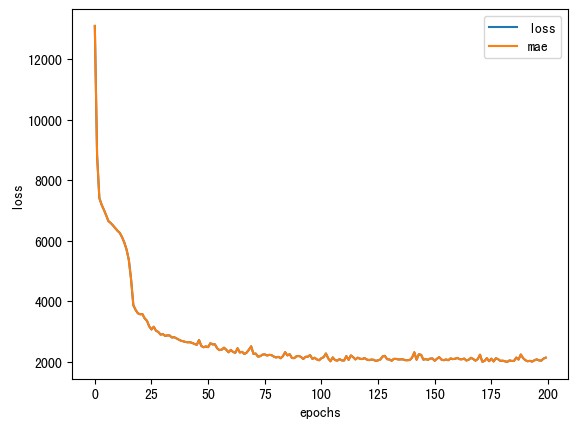

In [20]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()